# TUGAS BESAR PENGANTI UAS MTL

## **Anggota Kelompok :**
-   Geovani Prihanda Mahkdagasta / 1101213102
-   Fadhil Dzikri Aqila / 1103213136
-   Azmi Taqiuddin Syah / 1103213078


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Menyiapkan Data: 
## **Melakukan visualisasi data untuk melihat pola dan tren yang ada**

Production    float64
dtype: object
Index(['Production'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


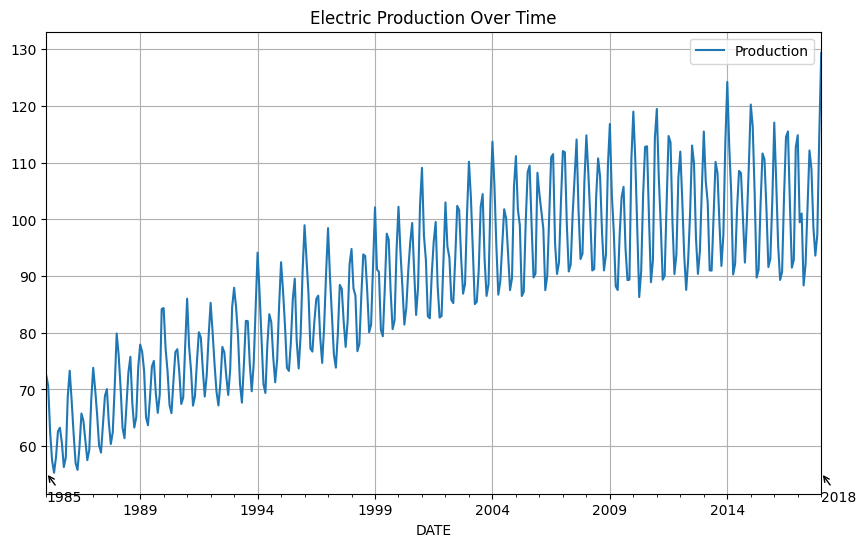

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

data = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')
data.rename(columns={data.columns[0]: 'Production'}, inplace=True)
data.sort_index(inplace=True)

print(data.dtypes)  
print(data.columns)  

data.info()  

ax = data.plot(title='Electric Production Over Time', figsize=(10, 6))
ax.set_xlim([datetime.datetime(1985, 1, 1), datetime.datetime(2018, 1, 1)])

ax.annotate('1985', xy=(datetime.datetime(1985, 1, 1), data['Production'].min()), 
            xytext=(datetime.datetime(1985, 1, 1), data['Production'].min() - 5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))

ax.annotate('2018', xy=(datetime.datetime(2018, 1, 1), data['Production'].min()), 
            xytext=(datetime.datetime(2018, 1, 1), data['Production'].min() - 5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.grid(True)  
plt.show()


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Membaca file CSV dan memprosesnya
data = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')

# Mengganti nama kolom untuk kolom pertama
data.rename(columns={data.columns[0]: 'Production'}, inplace=True)

# Mengurutkan data berdasarkan index
data.sort_index(inplace=True)

# Menampilkan beberapa baris pertama dari dataset
print(data.head())  # Menampilkan 5 baris pertama

# Jika Anda ingin melihat seluruh dataset (jika tidak terlalu besar)
# print(data)


            Production
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [4]:
print(data['Production'].head())  
print(data.index.min(), data.index.max())  
print(data.dtypes)  

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: Production, dtype: float64
1985-01-01 00:00:00 2018-01-01 00:00:00
Production    float64
dtype: object


In [5]:
print(data.index)  
print(data.index.dtype)  
print(data['Production'].dtype)  

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)
datetime64[ns]
float64


## **Jika Data terlalu besar maka gunakan skala logaritmik**

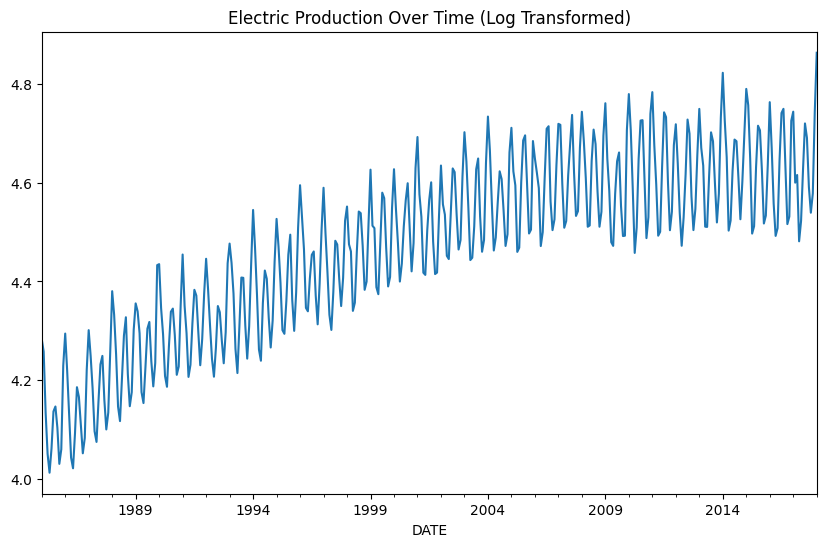

In [6]:
data['Log_Production'] = np.log(data['Production']) 
 
data['Log_Production'].plot(title='Electric Production Over Time (Log Transformed)', figsize=(10, 6))
plt.show()

## **Data tidak terlalu besar maka tidak diperlukan pengskalaan logaritmik**

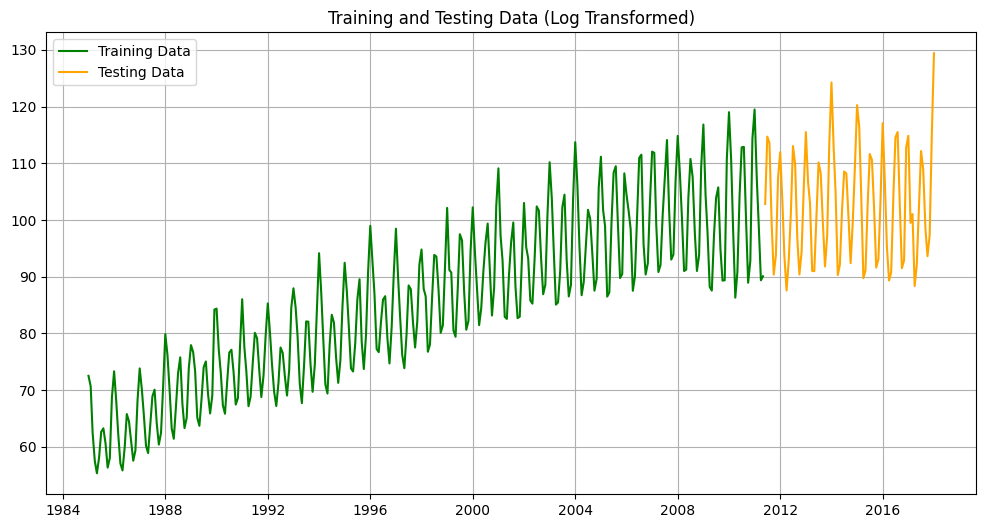

In [7]:
train_size = int(len(data) * 0.8)  # 80% untuk training
data_train = data.iloc[:train_size].copy()  # Data training
data_test = data.iloc[train_size:].copy()  # Data testing

plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train['Production'], label='Training Data', color='green')
plt.plot(data_test.index, data_test['Production'], label='Testing Data', color='orange')
plt.title('Training and Testing Data (Log Transformed)')
plt.legend()
plt.grid(True)  
plt.show()

# 2. Menguji Stasionaritas Data

In [8]:
print(data.columns)

Index(['Production', 'Log_Production'], dtype='object')


## **Menggunakan ACF dan PACF untuk mengecek apakah data Stasioner atau tidak**

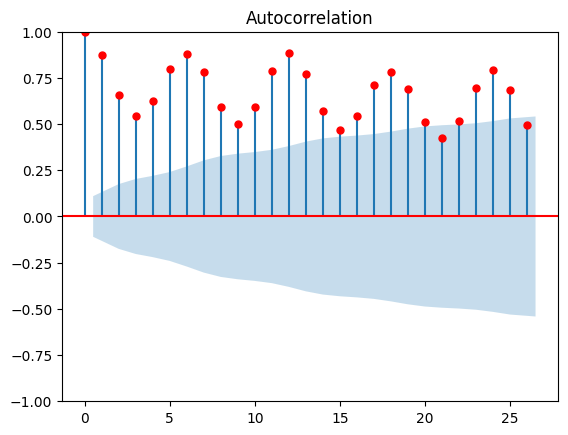

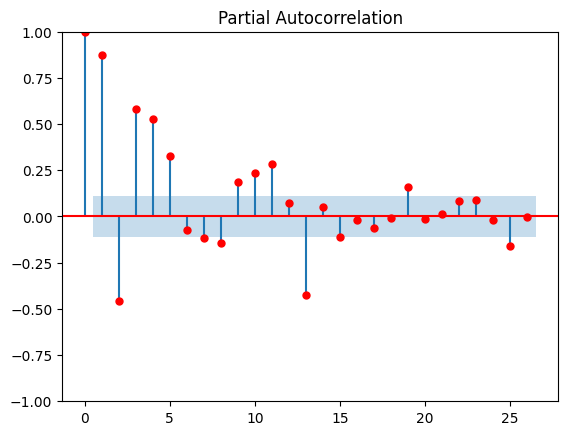

In [9]:
acf_original = plot_acf(data_train ['Production'], color = 'red')
pacf_original = plot_pacf(data_train ['Production'], color = 'red')

-   Pada tampilan grafik ACF 
    Terlihat bahwa banyak nilai autokorelasi yang signifikan pada berbagai lag, yang menunjukkan bahwa data deret waktu ini kemungkinan besar tidak stasioner.

-   Pada grafik PACF 
    Terdapat lonjakan signifikan pada lag 1 dan beberapa lag lainnya, tetapi sebagian besar nilai berada dalam interval kepercayaan, yang menunjukkan bahwa deret waktu ini mungkin stasioner.

Namun, untuk memastikan stasioneritas, diperlukan uji lebih lanjut seperti uji Augmented Dickey-Fuller (ADF).



In [14]:
adf_test = adfuller(data_train['Production'])
print(f'p-value: {adf_test[1]}')

p-value: 0.41129393445577683


Ketentuan Keputusan:

-   Jika 𝑝-value < 0.05, maka kita tolak H0 dan menyimpulkan bahwa data stasioner.

-   Jika p-value ≥ 0.05, maka kita gagal menolak 𝐻0 dan menyimpulkan bahwa data tidak stasioner.

Nilai p-value = 0.41129393445577683 (lebih besar dari 0.05).
Gagal menolak H0, sehingga data tidak stasioner.

## **Menggunakan pendekatan Differencing**

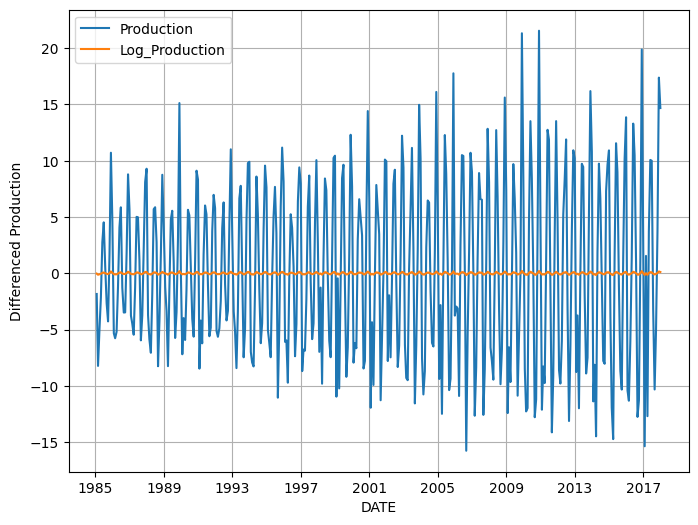

In [69]:
# Misalkan data adalah dataframe yang sudah ada dan memiliki kolom 'Production'
# Menambahkan kolom Log_Production
data['Log_Production'] = np.log(data['Production'])

# Mendifferensiasi data untuk menghilangkan ketidakstasioneran
data_diff = data.diff().dropna()

# Membuat plot
plt.figure(figsize=(8, 6))

# Plot data differenced 'Production'
plt.plot(data_diff.index, data_diff['Production'], label='Production', color='tab:blue')

# Plot data differenced 'Log_Production'
plt.plot(data_diff.index, data_diff['Log_Production'], label='Log_Production', color='tab:orange')

# Menambahkan label dan grid
plt.xlabel("DATE")
plt.ylabel("Differenced Production")
plt.legend()
plt.grid(True)

# Menambahkan label pada sumbu X dengan interval tahunan
years = list(range(1985, 2019, 4))
plt.xticks(
    ticks=[pd.Timestamp(str(year) + "-01-01") for year in years],
    labels=[str(year) for year in years]
)

# Menampilkan plot
plt.show()


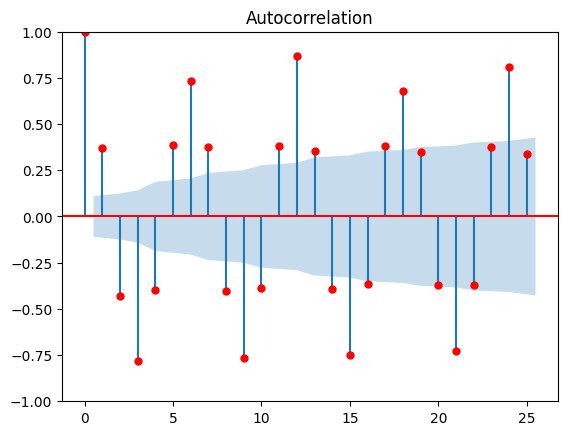

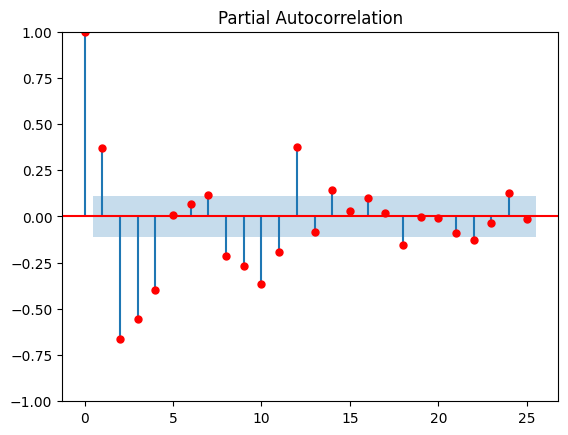

In [29]:
acf_diff = plot_acf(data_train_diff, color='red')
pacf_diff = plot_pacf(data_train_diff, color='red')


In [23]:
adf_test = adfuller(data_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.5832755038268183e-08


-   p-value = 2.5832755038268183e-08 (≈ 2.58 × 10^-8).

Karena p-value sangat kecil (≤ 0.05), maka kita tolak H0. Dan data menjadi stasioner.

# 3. Identifikasi Model ARIMA (p, d, q)

In [33]:
model = ARIMA(data_train['Production'], order=(1,1,1))
model_fit1 = model.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  317
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1022.680
Date:                Fri, 10 Jan 2025   AIC                           2051.361
Time:                        13:21:01   BIC                           2062.628
Sample:                    01-01-1985   HQIC                          2055.862
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0472      0.101      0.468      0.640      -0.150       0.245
ma.L1          0.5736      0.075      7.691      0.000       0.427       0.720
sigma2        37.8392      2.997     12.625      0.0

c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
model = ARIMA(data_train['Production'], order=(0,1,1))
model_fit2 = model.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  317
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1022.834
Date:                Fri, 10 Jan 2025   AIC                           2049.668
Time:                        13:31:37   BIC                           2057.179
Sample:                    01-01-1985   HQIC                          2052.669
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6004      0.046     13.003      0.000       0.510       0.691
sigma2        37.8768      3.003     12.614      0.000      31.991      43.762
Ljung-Box (L1) (Q):                   0.16   Jarque-

c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
model = ARIMA(data_train['Production'], order=(1,1,0))
model_fit3 = model.fit()
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  317
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1050.800
Date:                Fri, 10 Jan 2025   AIC                           2105.600
Time:                        13:32:02   BIC                           2113.112
Sample:                    01-01-1985   HQIC                          2108.601
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3706      0.066      5.633      0.000       0.242       0.500
sigma2        45.2535      3.855     11.738      0.000      37.697      52.810
Ljung-Box (L1) (Q):                  19.32   Jarque-

c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
model = ARIMA(data_train, order=(1,1,2))
model_fit4 = model.fit()
print(model_fit4.summary())

c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  317
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -973.506
Date:                Thu, 26 Dec 2024   AIC                           1955.011
Time:                        01:29:52   BIC                           1970.034
Sample:                    01-01-1985   HQIC                          1961.013
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3459      0.089      3.902      0.000       0.172       0.520
ma.L1         -0.2413      0.059     -4.069      0.000      -0.358      -0.125
ma.L2         -0.6586      0.051    -12.827      0.0

In [ ]:
model = ARIMA(data_train, order=(2,1,1))
model_fit5 = model.fit()
print(model_fit5.summary())

# 4. Membangun Model ARIMA
## **Pemilihan model berdasarkan analisis ACF dan PACF**

In [36]:
data_train['log_Production'] = np.log(data_train['Production'] + 1)  
model = ARIMA(data_train['log_Production'], order=(8, 1, 2))
model_fit6 = model.fit()

print(model_fit6.summary())

c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_Production   No. Observations:                  317
Model:                 ARIMA(8, 1, 2)   Log Likelihood                 621.018
Date:                Fri, 10 Jan 2025   AIC                          -1220.036
Time:                        14:23:13   BIC                          -1178.723
Sample:                    01-01-1985   HQIC                         -1203.532
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8739      0.072     12.133      0.000       0.733       1.015
ar.L2         -0.9250      0.089    -10.360      0.000      -1.100      -0.750
ar.L3          0.3579      0.107      3.343      0.0

c:\Users\geova\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 5. Evaluasi Model
## **Uji signifikansi parameter, menguji kesalahan model dan uji goodness-of-fit menggunakan berbagai metrik seperti AIC atau BIC**

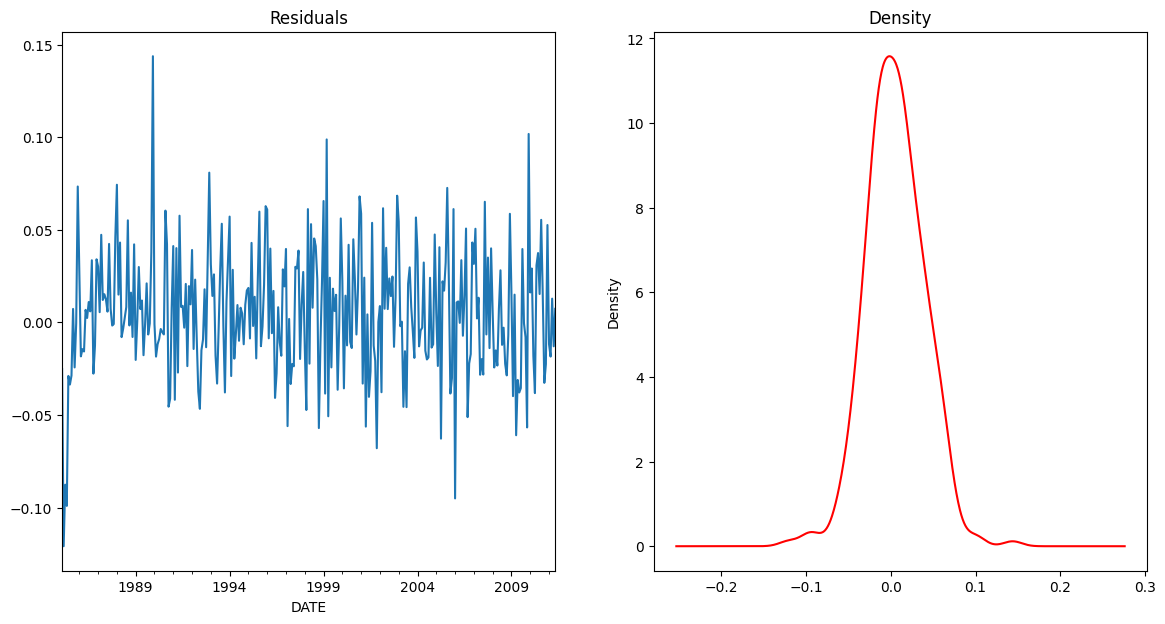

In [37]:
residuals = model_fit6.resid[1:]

fig, ax = plt.subplots(1, 2, figsize=(14, 7)) 
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1], color ='red')

plt.show()

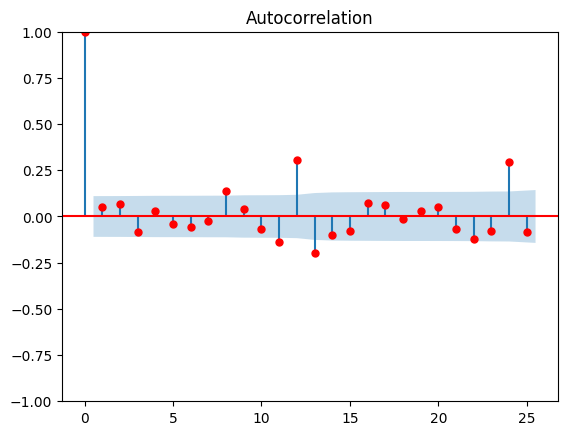

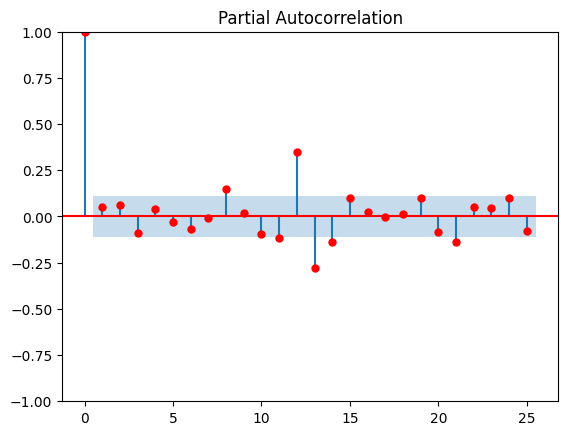

In [38]:
acf_res = plot_acf(residuals, color ='red')

pacf_res = plot_pacf(residuals, color ='red')

In [39]:
lb_test = acorr_ljungbox(residuals, lags=10)
print(lb_test)

      lb_stat  lb_pvalue
1    0.922264   0.336881
2    2.328651   0.312133
3    4.616690   0.202115
4    4.953403   0.292112
5    5.447464   0.363741
6    6.598600   0.359567
7    6.838071   0.445933
8   13.230420   0.104164
9   13.827671   0.128589
10  15.338890   0.120186


# 6. Prediksi
## **Dengan periode prediksi 12 bulan/1 tahun**

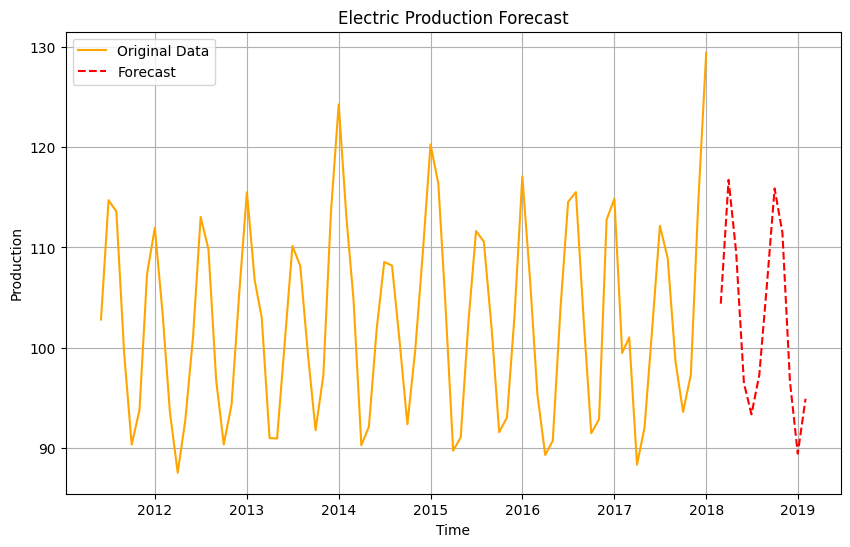

In [67]:
# Forecast dengan ARIMA
forecast = model_fit6.forecast(steps=12)

# Pastikan data_test memiliki indeks waktu yang benar
# Jika data_test tidak memiliki indeks waktu, konversikan seperti ini:
# data_test.index = pd.to_datetime(data_test.index)

# # Ganti frekuensi 'M' dengan 'ME' dan pastikan indeks forecast benar
# forecast_index = pd.date_range(start=data_test.index[-1], periods=13, freq='ME')[1:]

# # Konversi forecast ke nilai asli menggunakan inverse log
# forecast_values = np.exp(forecast) - 1

# # Periksa hasil forecast
# print("Forecasted Values:")
# forecast_series = pd.Series(forecast_values, index=forecast_index)
# print(forecast_series)

# Plot hasil forecast
plt.figure(figsize=(10, 6))
plt.plot(data_test.index, data_test['Production'], label='Original Data', color='orange')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='--')
plt.legend()
plt.title('Electric Production Forecast')
plt.xlabel('Time')
plt.ylabel('Production')
plt.grid(True)
plt.show()

